In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from tensorflow.keras import optimizers, Input, Model, metrics
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import random
import shutil
import PIL

In [9]:
t_model = VGG16(include_top=True, )
t_model.trainable = False

cd_model = Sequential()
cd_model.add(t_model)
cd_model.add(Flatten())
cd_model.add(Dense(64, activation='relu'))
cd_model.add(Dropout(0.5))
cd_model.add(Dense(1, activation='sigmoid'))

t_model.summary()
# cd_model.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
path = "data/dogs-vs-cats/train/"

for i in os.listdir(path+'train'):
    catagory = i.split(".")[0]
    if catagory == "cat":
        os.makedirs(path + 'cats', exist_ok=True)
        shutil.move(path + 'train/' + i, path + 'cats')
    else:
        os.makedirs(path + 'dogs', exist_ok=True)
        shutil.move(path + 'train/' + i, path + 'dogs')
os.removedirs(path+'train')

In [11]:
# os.makedirs(path + 'train', exist_ok=True)

# for i in os.listdir(path + 'cats'):
#     shutil.move(path + 'cats/' + i, path + 'train')

# for i in os.listdir(path + 'dogs'):
#     shutil.move(path + 'dogs/' + i, path + 'train')
    
# os.removedirs(path+'cats')
# os.removedirs(path+'dogs')

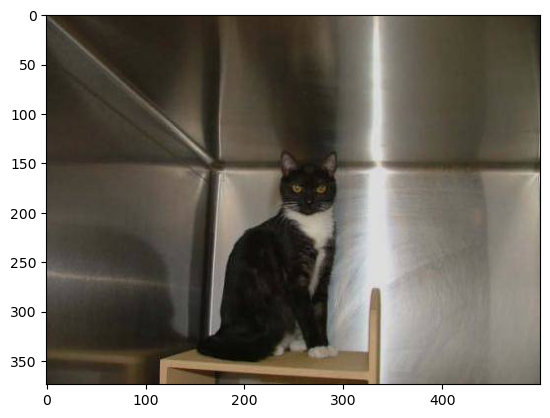

In [14]:

num = random.randint(1, 12499)
# img = np.asarray(PIL.Image.open("data/dogs-vs-cats/train/dogs/dog.{}.jpg".format(num)))
img = np.asarray(PIL.Image.open("data/dogs-vs-cats/train/cats/cat.{}.jpg".format(num)))
plt.imshow(img)

In [16]:
train_datagen = ImageDataGenerator(rescale=1./255,      # 각도 기울이기
                                   rotation_range=15,   # 정규화
                                   shear_range=0.2,     # 이미지 기울이기
                                   zoom_range=0.2,      # 확대
                                   horizontal_flip=True,# 좌우 반전
                                   fill_mode='nearest', # 이미지 빈 공간 채우기
                                   width_shift_range=0.1,   # 수평 이동
                                   height_shift_range=0.1)  # 수직 이동

train_gen = train_datagen.flow_from_directory(path,
                                              class_mode='binary',
                                              target_size=(224, 224),
                                              batch_size=32, shuffle=True)

test_data_gn = ImageDataGenerator(rescale=1./255)
test_gen = test_data_gn.flow_from_directory(path, target_size=(224,224), batch_size=32,
                                            class_mode='binary')


Found 17137 images belonging to 2 classes.
Found 17137 images belonging to 2 classes.


In [19]:

cd_model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(learning_rate = .2), metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3)

cd_model.fit(train_gen, batch_size=256, epochs=200, validation_data=test_gen,validation_steps=10, callbacks=[early_stopping])


Epoch 1/200
536/536 [==============================] - 4226s 8s/step - loss: 0.5863 - accuracy: 0.7277 - val_loss: 0.5786 - val_accuracy: 0.7500
Epoch 2/200
 46/536 [=>............................] - ETA: 1:07:39 - loss: 0.5740 - accuracy: 0.7439

UnknownError: Graph execution error:

FileNotFoundError: [Errno 2] No such file or directory: 'data/dogs-vs-cats/train/dogs\\dog.1797.jpg'
Traceback (most recent call last):

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\tensorflow\python\ops\script_ops.py", line 271, in __call__
    ret = func(*args)

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 1039, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\keras\engine\data_adapter.py", line 901, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\keras\engine\data_adapter.py", line 1048, in generator_fn
    yield x[i]

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\keras\preprocessing\image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\keras\preprocessing\image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "C:\Users\jakek\anaconda3\envs\py3.8\lib\site-packages\keras\utils\image_utils.py", line 422, in load_img
    with open(path, "rb") as f:

FileNotFoundError: [Errno 2] No such file or directory: 'data/dogs-vs-cats/train/dogs\\dog.1797.jpg'


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_10848]

In [ ]:
pred ='data/dogs-vs-cats/cat_dog_pred'
for i in pred:
    cd_model.predict(pred[i])
